### 作業
####  目標: 建立一深度學習模型預測客戶是否流失

- 問題一: 請將資料區分為訓練與測試資料集
- 問題二: 請將資料標準化
- 問題三: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題四: 評估模型準確度
- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

In [10]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
# df.iloc[列,欄]
df = df.iloc[:,3:] # 取得所有的列, 只取得第三欄以後所有的資料
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


## 建立機器學習模型前，資料必須是什麼格式：

- 資料必須是結構化資料表 (每一列有相同欄位數, 每個欄位都有自己的格式, 資料呈現方方正正的樣貌)

- 所有的欄位都必須是數值化格式　(FLOAT, INT)

- 所有的資料都必須存在, 沒有遺失值(Missing Value)

#### 資料必須是結構化資料表 (每一列有相同欄位數, 每個欄位都有自己的格式, 資料呈現方方正正的樣貌) 

In [13]:
type(df)

pandas.core.frame.DataFrame

#### 所有的欄位都必須是數值化格式　(FLOAT, INT)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
df.select_dtypes('object').head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [17]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
geo = pandas.get_dummies(df['Geography'])
del geo['Spain']
geo.head(3)

,France,Germany
0,1,0
1,0,0
2,1,0


In [20]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
gender = pandas.get_dummies(df['Gender'])
del gender['Female']
gender.head(3)

,Male
0,0
1,0
2,0


In [24]:
df = pandas.concat([gender, geo, df],axis  = 1)

In [25]:
df.head(3)

,Male,France,Germany,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,0,0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,1,0,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [26]:
del df['Geography']

In [27]:
del df['Gender']

In [28]:
df.head()

,Male,France,Germany,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,1,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,1,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,0,850,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Male               10000 non-null uint8
France             10000 non-null uint8
Germany            10000 non-null uint8
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


#### 所有的資料都必須存在, 沒有遺失值(Missing Value)

In [31]:
df.isna().sum()

Male               0
France             0
Germany            0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
X =  df.iloc[:,:-1]
#X.head()
y =  df.iloc[:,-1]
#y.head()

### 問題一: 請將資料區分為訓練與測試資料集

In [36]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42 )

In [37]:
train_X.shape

(8000, 11)

In [38]:
test_X.shape

(2000, 11)

In [39]:
train_y.shape

(8000,)

In [40]:
test_y.shape

(2000,)

### 問題二: 請將資料標準化

In [41]:
from sklearn.preprocessing import StandardScaler
# (data - mean) / std
sc = StandardScaler()
scaled_X = sc.fit_transform(train_X)

In [44]:
scaled_X[0:3,:]

array([[ 0.91324755,  1.00150113, -0.57946723,  0.35649971, -0.6557859 ,
         0.34567966, -1.21847056,  0.80843615,  0.64920267,  0.97481699,
         1.36766974],
       [ 0.91324755, -0.99850112,  1.72572313, -0.20389777,  0.29493847,
        -0.3483691 ,  0.69683765,  0.80843615,  0.64920267,  0.97481699,
         1.6612541 ],
       [ 0.91324755, -0.99850112, -0.57946723, -0.96147213, -1.41636539,
        -0.69539349,  0.61862909, -0.91668767,  0.64920267, -1.02583358,
        -0.25280688]])

In [42]:
test_X = sc.transform(test_X)

In [45]:
test_X[0:3,:]

array([[ 0.91324755, -0.99850112,  1.72572313, -0.57749609, -0.6557859 ,
        -0.69539349,  0.32993735,  0.80843615, -1.54035103, -1.02583358,
        -1.01960511],
       [ 0.91324755,  1.00150113, -0.57946723, -0.29729735,  0.3900109 ,
        -1.38944225, -1.21847056,  0.80843615,  0.64920267,  0.97481699,
         0.79888291],
       [-1.09499335, -0.99850112, -0.57946723, -0.52560743,  0.48508334,
        -0.3483691 , -1.21847056,  0.80843615,  0.64920267, -1.02583358,
        -0.72797953]])

### 問題三: 使用Keras 建立深度學習模型預測客戶是否流失

In [46]:
import keras

Using TensorFlow backend.


In [47]:
from keras.layers import Dense, Dropout

In [49]:
?Dense

In [70]:
model = keras.Sequential()
model.add(Dense(units = 5, activation='relu',activity_regularizer=, input_shape = (11,) ))
model.add(Dropout(rate=0.1))
model.add(Dense(units = 5, activation='relu' ))
model.add(Dropout(rate=0.1))
model.add(Dense(units = 1, activation='sigmoid' ))

W0831 10:45:12.011343  5152 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [71]:
?model.compile

In [72]:
model.compile('adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [73]:
?model.fit

In [74]:
ck = keras.callbacks.ModelCheckpoint('1.hd5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=5)

In [77]:
history = model.fit(scaled_X, train_y,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_data=(test_X, test_y),
                    callbacks = [ck])

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 0s 26us/step - loss: 0.3775 - acc: 0.8494 - val_loss: 0.3462 - val_acc: 0.8570
Epoch 2/10
8000/8000 [==============================] - 0s 26us/step - loss: 0.3789 - acc: 0.8458 - val_loss: 0.3458 - val_acc: 0.8575
Epoch 3/10
8000/8000 [==============================] - 0s 25us/step - loss: 0.3801 - acc: 0.8431 - val_loss: 0.3458 - val_acc: 0.8570
Epoch 4/10
8000/8000 [==============================] - 0s 25us/step - loss: 0.3764 - acc: 0.8474 - val_loss: 0.3453 - val_acc: 0.8625
Epoch 5/10
8000/8000 [==============================] - 0s 26us/step - loss: 0.3741 - acc: 0.8474 - val_loss: 0.3456 - val_acc: 0.8600
Epoch 6/10
8000/8000 [==============================] - 0s 28us/step - loss: 0.3756 - acc: 0.8493 - val_loss: 0.3444 - val_acc: 0.8585
Epoch 7/10
8000/8000 [==============================] - 0s 26us/step - loss: 0.3750 - acc: 0.8473 - val_loss: 0.3467 - val_acc: 0.8575
Epoch 8

In [59]:
model.save('churn_predict.hd5')

In [60]:
import keras
model = keras.models.load_model('churn_predict.hd5')

### 問題四: 評估模型準確度

In [84]:
predicted = (model.predict(test_X) > 0.5).flatten() .astype(int)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

0.858

In [86]:
confusion_matrix(test_y, predicted)

array([[1549,   58],
       [ 226,  167]], dtype=int64)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predicted))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.74      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



### 問題五: 請繪製ROC Curve, 並求出 AUC

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(test_y, model.predict(test_X))
auc(fpr, tpr)

0.8561573016272637

Populating the interactive namespace from numpy and matplotlib


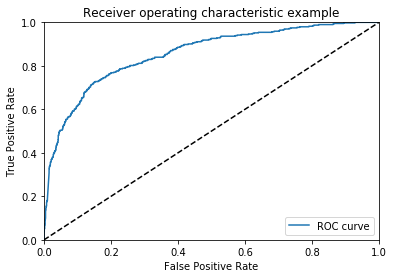

In [95]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(scaled_X, train_y)

clf2 = SVC(probability = True)
clf2.fit(scaled_X, train_y)

clf3 = LogisticRegression()
clf3.fit(scaled_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(scaled_X, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(scaled_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


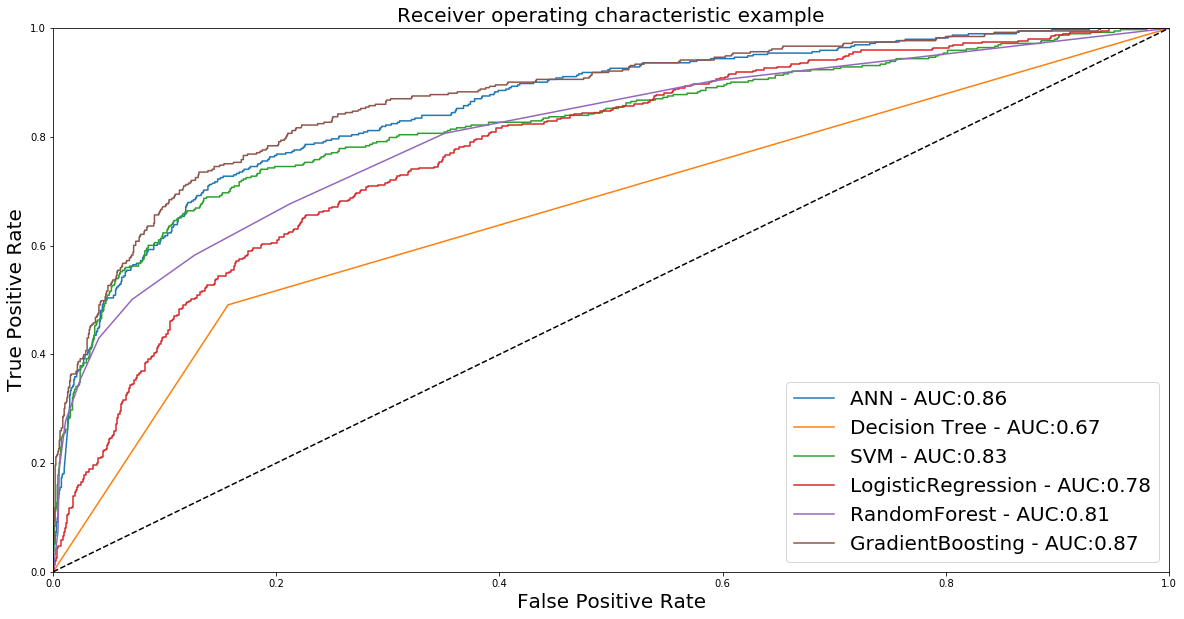

In [96]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])

for clf, title in zip(
    [model,clf1,clf2,clf3, clf4,clf5], 
    ['ANN','Decision Tree','SVM', 'LogisticRegression', 'RandomForest', 'GradientBoosting']):
    if title != 'ANN':
        probas_ = clf.fit(scaled_X, train_y).predict_proba(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    else:
        y_pred = clf.predict(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## Gimp
- gimp.org/downloads/

## transform, fit_transform

In [97]:
a= [[50],[60],[70],[80],[90]]
b= [[80],[85],[90]]
import numpy
na = numpy.array(a)
nb = numpy.array(b)

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
s = sc.fit(na)

In [100]:
s.mean_

array([70.])

In [101]:
s.var_

array([200.])

In [102]:
sc.fit_transform(na)

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [103]:
sc.transform(nb)

array([[0.70710678],
       [1.06066017],
       [1.41421356]])

## 建立卷積神經網路來辨識手寫數字

### 引用Keras

In [104]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

### 讀取MNIST 數據

In [105]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [106]:
x_train.shape

(60000, 28, 28)

In [107]:
x_test.shape

(10000, 28, 28)

In [108]:
y_train.shape

(60000,)

In [109]:
y_test.shape

(10000,)

In [110]:
x_train = x_train.reshape(60000, 28,28,1) #(圖片張數, 圖片長, 圖片寬, 顏色channel)
x_test  = x_test.reshape(10000, 28,28,1) #(圖片張數, 圖片長, 圖片寬, 顏色channel)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [111]:
y_train[0]

5

In [112]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [113]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 建立卷積神經網路

In [114]:
n_hidden_1 = 256
n_hidden_2 = 256 
training_epochs = 15
batch_size = 100

In [115]:
model = keras.Sequential()

model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(n_hidden_1, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

W0831 12:11:25.894482  5152 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               803072    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 805,802
Trainable params: 805,802
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [118]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 18s 303us/step - loss: 0.2255 - acc: 0.9329 - val_loss: 0.1024 - val_acc: 0.9689
Epoch 2/15
60000/60000 [==============================] - 18s 297us/step - loss: 0.0770 - acc: 0.9772 - val_loss: 0.0656 - val_acc: 0.9786
Epoch 3/15
60000/60000 [==============================] - 18s 297us/step - loss: 0.0478 - acc: 0.9854 - val_loss: 0.0503 - val_acc: 0.9839
Epoch 4/15
60000/60000 [==============================] - 17s 290us/step - loss: 0.0350 - acc: 0.9894 - val_loss: 0.0480 - val_acc: 0.9836
Epoch 5/15
60000/60000 [==============================] - 18s 298us/step - loss: 0.0242 - acc: 0.9930 - val_loss: 0.0392 - val_acc: 0.9868
Epoch 6/15
60000/60000 [==============================] - 17s 276us/step - loss: 0.0187 - acc: 0.9941 - val_loss: 0.0444 - val_acc: 0.9859
Epoch 7/15
60000/60000 [==============================] - 16s 272us/step - loss: 0.0132 - acc: 0.9959 - val_loss: 0.

In [122]:
import numpy
predicted = numpy.argmax(model.predict(x_test), axis = 1)

In [125]:
answer = numpy.argmax(y_test, axis = 1)

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(answer, predicted)

0.9886

In [127]:
confusion_matrix(answer, predicted)

array([[ 973,    1,    2,    1,    0,    0,    2,    0,    0,    1],
       [   0, 1127,    3,    0,    0,    0,    3,    1,    1,    0],
       [   0,    2, 1021,    1,    1,    0,    1,    4,    2,    0],
       [   0,    0,    3, 1002,    0,    2,    0,    0,    2,    1],
       [   0,    0,    0,    0,  977,    0,    0,    0,    1,    4],
       [   1,    0,    0,    8,    0,  879,    3,    0,    1,    0],
       [   5,    3,    0,    0,    1,    2,  946,    0,    1,    0],
       [   0,    2,    5,    3,    0,    0,    0, 1016,    1,    1],
       [   2,    1,    2,    3,    0,    1,    0,    1,  960,    4],
       [   1,    2,    1,    4,    8,    3,    0,    3,    2,  985]],
      dtype=int64)

In [138]:
from PIL import Image
img = Image.open('4.jpg').convert('L')
img

In [139]:
imgary = (255 - np.array(img)) / 255

In [140]:
imgary.shape

(28, 28)

In [141]:
imgary2 = imgary.reshape(28,28,1)

In [142]:
imgary2.shape

(28, 28, 1)

In [143]:
imgary3 = np.expand_dims(imgary2, axis = 0)

In [144]:
imgary3.shape

(1, 28, 28, 1)

In [145]:
np.argmax(model.predict(imgary3))

4

## [實例] 利用卷積神經網路辨識圖片

### 自己寫爬蟲

In [3]:
import requests
from bs4 import BeautifulSoup
google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'
res = requests.get(google_url.format('周子瑜', 0))
soup = BeautifulSoup(res.text, 'lxml' )

In [11]:
for alink in soup.select('a img'):
    if alink.get('src'):
        print(alink.get('src'))
        print('======================')

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSusiRDen63kpJt1tKfPRrrohK1O06dKpMw7vqn4mKC0I7d7SrVyQ
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8vQgndPe1a-ENKD16Q_qItZbj58at5oQu_x8f6MFwbSF8Gy6u
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLj8QNjvWyzBVLrBJ8RYZFCnq-ueBQ6-HN2uv50Nr23ojWIoeFOg
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4tJeNm9SPJSrq_6o6Fk9PpkXv0oOa23VZV7OC7-9jcSPkfFaYXg
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUKuniCIq_bcdxjYl73miKP3sYBdEbXV21iimjmM_5AiqjgIrGog
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlsIyQqFJA3BfrtGesXk3OEF339r-a36JeZCCaDqG3_6qK_DOV
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlPzcL8oZPRCRxp-GO4XnapE4gy7s2O12bhmL3ihctYSKjXVc9Ag
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpz161DMx7_8FlK7bHsFElEZqzkv_ep7GkzmXHS3_K-7aLHC5z2w
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8WAobvi9cqAQS-tGxzyyw3mXIyhakelIoMWrhkr9XFILj7voF
https://encrypted-tbn0.gstatic.com/images?q

In [13]:
res = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSusiRDen63kpJt1tKfPRrrohK1O06dKpMw7vqn4mKC0I7d7SrVyQ')
with open('1.jpg' , 'wb') as f:
    f.write(res.content)

In [18]:
def getPicture(path, url):
    res = requests.get(url)
    with open('{}/{}.jpg'.format(path, url.split('tbn:')[1]) , 'wb') as f:
        f.write(res.content)

In [20]:
getPicture('zhiyu','https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWH_aMTZOkNXT6NK7WwBP_0OgA5Ugv34HT0t-pNoUannRIj0IM1A')

In [24]:
import requests
import os
from bs4 import BeautifulSoup
google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'

def getIdolImage(path, term, pagenum):
    if not os.path.exists(path):
        os.mkdir(path)
    for p in range(pagenum):
        res = requests.get(google_url.format(term, p* 100))
        soup = BeautifulSoup(res.text, 'lxml' )
        for alink in soup.select('a img'):
            if alink.get('src'):
                getPicture(path, alink.get('src'))

In [26]:
getIdolImage('zhiyu','周子瑜', 5)

In [27]:
getIdolImage('chilin','林志玲', 5)

In [28]:
getIdolImage('puff','郭雪芙', 5)

### google_images_download

In [29]:
! pip install google_images_download

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\1f\28\ad\f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [30]:
from google_images_download import google_images_download 
response = google_images_download.googleimagesdownload()   
arguments = {"keywords":"北極熊","limit":20,"print_urls":True}   
paths = response.download(arguments) 


Item no.: 1 --> Item name = \u5317\u6975\u718a
Evaluating...
Starting Download...
Image URL: https://www.natgeomedia.com/wp-content/uploads/2018/08/explore-through-the-lens-polar-bear.adapt_.885.1-801x1024.jpg
Completed Image ====> 1.explore-through-the-lens-polar-bear.adapt_.885.1-801x1024.jpg
Image URL: https://images.chinatimes.com/newsphoto/2019-07-29/900/20190729003677.jpg
Completed Image ====> 2.20190729003677.jpg
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Polar_Bear_ANWR_1.jpg/300px-Polar_Bear_ANWR_1.jpg
Completed Image ====> 3.300px-Polar_Bear_ANWR_1.jpg
Image URL: http://taiwanbear.org.tw/admin/resource/images/f5cec8c65ae27a.jpeg
Completed Image ====> 4.f5cec8c65ae27a.jpeg
Image URL: https://cw1.tw/CW/images/article/201704/article-58f87f1924ef8.jpg
Completed Image ====> 5.article-58f87f1924ef8.jpg
Image URL: https://cdn2.ettoday.net/images/3846/d3846148.jpg
Completed Image ====> 6.d3846148.jpg
Image URL: http://www.hkedcity.net/cms_files/cms-funpost/